In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_nba_og = pd.read_csv('NBA_Stats_71_Years_Updated.csv')

In [3]:
df_nba_og.head(10)

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,NaN,NaN,NaN,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,NaN,NaN,NaN,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,NaN,NaN,NaN,269,1052,935,NaN,NaN
5,6,1951-52,1951,Regular Season,76250,Frank Brian,1610612765,FTW,66,2672,...,232,233,NaN,NaN,NaN,220,1051,820,NaN,NaN
6,7,1951-52,1951,Regular Season,76744,Larry Foust,1610612765,FTW,66,2615,...,880,200,NaN,NaN,NaN,245,1047,1401,NaN,NaN
7,8,1951-52,1951,Regular Season,78453,Bobby Wanzer,1610612758,ROC,66,2498,...,333,262,NaN,NaN,NaN,201,1033,1144,NaN,NaN
8,9,1951-52,1951,Regular Season,77967,Arnie Risen,1610612758,ROC,66,2396,...,841,150,NaN,NaN,NaN,258,1032,1333,NaN,NaN
9,10,1951-52,1951,Regular Season,77593,Vern Mikkelsen,1610612747,MNL,66,2345,...,681,180,NaN,NaN,NaN,282,1009,1278,NaN,NaN


In [4]:
df_nba_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33330 entries, 0 to 33329
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33330 non-null  int64  
 1   Year                33330 non-null  object 
 2   Season Start Year   33330 non-null  int64  
 3   Season Type         33330 non-null  object 
 4   Player ID           33330 non-null  int64  
 5   Player              33330 non-null  object 
 6   Team ID             33330 non-null  int64  
 7   Team                33330 non-null  object 
 8   Games Played        33330 non-null  int64  
 9   Minutes Played      33330 non-null  int64  
 10  FG Made             33330 non-null  int64  
 11  FG Attempts         33330 non-null  int64  
 12  FG %                33330 non-null  float64
 13  3-Pt FG Made        27034 non-null  float64
 14  3-Pt FG Attempts    27034 non-null  float64
 15  3-Pt FG %           27034 non-null  float64
 16  FT M

In [5]:
df_nba_og.isnull().sum()

Rank                     0
Year                     0
Season Start Year        0
Season Type              0
Player ID                0
Player                   0
Team ID                  0
Team                     0
Games Played             0
Minutes Played           0
FG Made                  0
FG Attempts              0
FG %                     0
3-Pt FG Made          6296
3-Pt FG Attempts      6296
3-Pt FG %             6296
FT Made                  0
FT Attempts              0
FT %                     0
Offensive Rebounds    4229
Defensive Rebounds    4229
Rebounds                 0
Assists                  0
Steals                4229
Blocks                4229
Turnovers             5566
Personal Fouls           0
Points Scored            0
Efficency                0
AST/TOV               5566
STL/TOV               5566
dtype: int64

In [6]:
df_nba = df_nba_og.drop(columns=['Team ID','AST/TOV','STL/TOV']).copy()

In [7]:
df_nba = df_nba_og
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33330 entries, 0 to 33329
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33330 non-null  int64  
 1   Year                33330 non-null  object 
 2   Season Start Year   33330 non-null  int64  
 3   Season Type         33330 non-null  object 
 4   Player ID           33330 non-null  int64  
 5   Player              33330 non-null  object 
 6   Team ID             33330 non-null  int64  
 7   Team                33330 non-null  object 
 8   Games Played        33330 non-null  int64  
 9   Minutes Played      33330 non-null  int64  
 10  FG Made             33330 non-null  int64  
 11  FG Attempts         33330 non-null  int64  
 12  FG %                33330 non-null  float64
 13  3-Pt FG Made        27034 non-null  float64
 14  3-Pt FG Attempts    27034 non-null  float64
 15  3-Pt FG %           27034 non-null  float64
 16  FT M

#### Removing missing values

In [8]:
df_nba['Offensive Rebounds'] = df_nba['Offensive Rebounds'].fillna(df_nba['Offensive Rebounds'].median())
df_nba['Defensive Rebounds'] = df_nba['Defensive Rebounds'].fillna(df_nba['Defensive Rebounds'].median())
df_nba['Steals'] = df_nba['Steals'].fillna(df_nba['Steals'].median())
df_nba['Blocks'] = df_nba['Blocks'].fillna(df_nba['Blocks'].median())
df_nba['Turnovers'] = df_nba['Turnovers'].fillna(df_nba['Turnovers'].median())
df_nba['3-Pt FG Made'] = df_nba['3-Pt FG Made'].fillna(df_nba['3-Pt FG Made'].median())
df_nba['3-Pt FG Attempts'] = df_nba['3-Pt FG Attempts'].fillna(df_nba['3-Pt FG Attempts'].median())
df_nba['3-Pt FG %'] = df_nba['3-Pt FG %'].fillna(df_nba['3-Pt FG %'].median())

In [9]:
num_of_rows = len(df_nba)
(df_nba.isnull().sum()/num_of_rows)*100

Rank                   0.00000
Year                   0.00000
Season Start Year      0.00000
Season Type            0.00000
Player ID              0.00000
Player                 0.00000
Team ID                0.00000
Team                   0.00000
Games Played           0.00000
Minutes Played         0.00000
FG Made                0.00000
FG Attempts            0.00000
FG %                   0.00000
3-Pt FG Made           0.00000
3-Pt FG Attempts       0.00000
3-Pt FG %              0.00000
FT Made                0.00000
FT Attempts            0.00000
FT %                   0.00000
Offensive Rebounds     0.00000
Defensive Rebounds     0.00000
Rebounds               0.00000
Assists                0.00000
Steals                 0.00000
Blocks                 0.00000
Turnovers              0.00000
Personal Fouls         0.00000
Points Scored          0.00000
Efficency              0.00000
AST/TOV               16.69967
STL/TOV               16.69967
dtype: float64

In [10]:
len(df_nba['Player'].unique())

4387

In [11]:
df_nba.head()

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,17.0,7.0,32.0,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,17.0,7.0,32.0,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,17.0,7.0,32.0,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,17.0,7.0,32.0,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,17.0,7.0,32.0,269,1052,935,NaN,NaN


In [12]:
df_nba['Season Start Year'].unique()

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

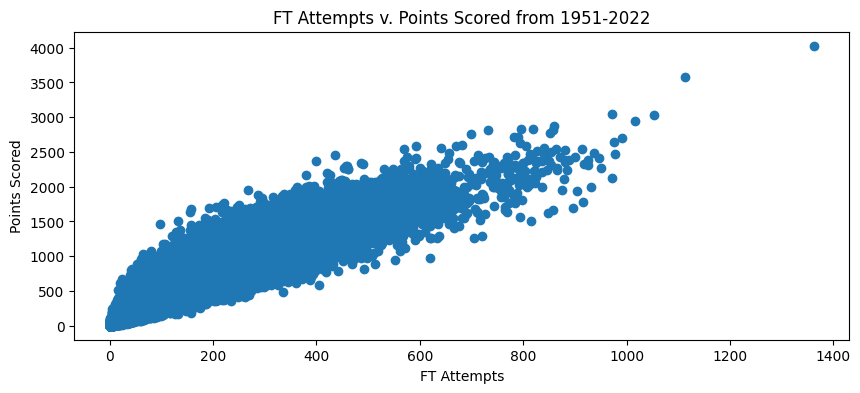

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df_nba['FT Attempts'], df_nba['Points Scored'])

ax.set_xlabel('FT Attempts')

ax.set_ylabel('Points Scored')

ax.set_title('FT Attempts v. Points Scored from 1951-2022')
plt.show()

<ipython-input-14-12ee34f2500d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_playoffs['PPG'] = top_playoffs['Points Scored'] / top_playoffs['Games Played']


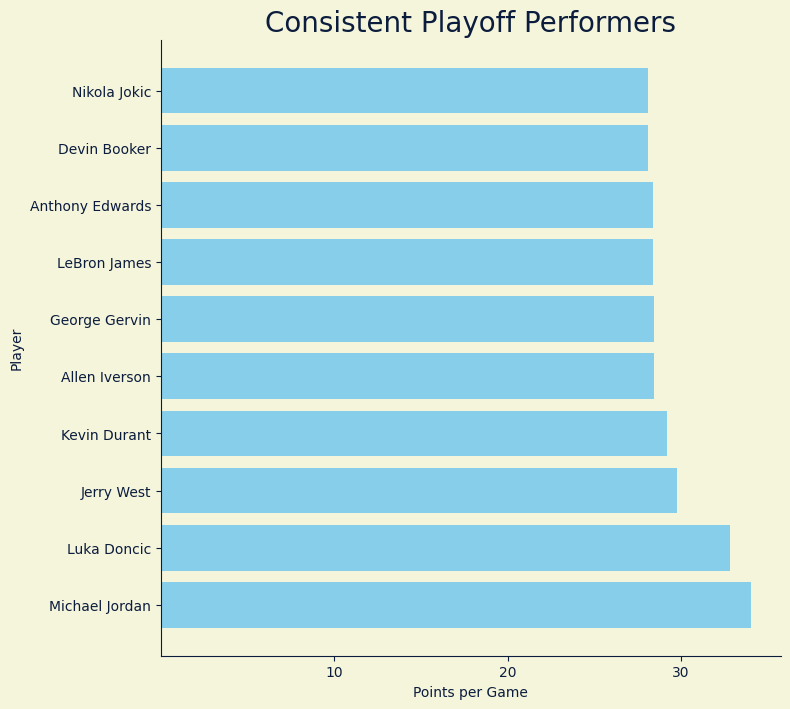

In [14]:
fig, ax = plt.subplots(figsize= (8,8))
top_playoffs = df_nba[(df_nba['Season Type'] == 'Playoffs') & (df_nba['Games Played'] > 2)]
top_playoffs['PPG'] = top_playoffs['Points Scored'] / top_playoffs['Games Played']
top10playoffs = top_playoffs.groupby('Player')['PPG'].mean().sort_values(ascending = False).head(10)

ax.barh(top10playoffs.index, top10playoffs, color = 'skyblue')

ax.set_title('Consistent Playoff Performers', fontsize=20, color = '#0B1C3D')
ax.set_xlabel('Points per Game')
ax.set_ylabel('Player')
ax.set_xticks([10, 20, 30])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')
ax.xaxis.label.set_color('#0B1C3D')
ax.yaxis.label.set_color('#0B1C3D')
ax.tick_params(axis='x',  colors='#0B1C3D')
ax.tick_params(axis='y',  colors='#0B1C3D')
ax.spines['left'].set_color('#0B1C3D')
ax.spines['bottom'].set_color('#0B1C3D')
plt.savefig('nbaplot.png')


In [15]:
df_players_by_rank = df_nba.groupby('Rank')['Player ID'].count()

In [16]:
x_rank = df_nba['Rank'].unique()
y_players = df_players_by_rank.values


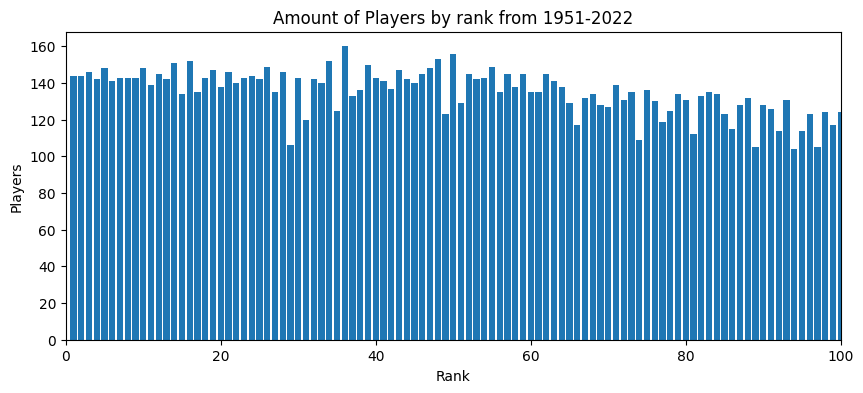

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x_rank,y_players)

ax.set_xlabel('Rank')
ax.set_xlim([0,100])

ax.set_ylabel('Players')

ax.set_title('Amount of Players by rank from 1951-2022')
plt.show()

In [18]:
df_nba_top100 = df_nba[df_nba['Rank']<=100].copy()

In [19]:
df_points_by_rank = df_nba_top100.groupby('Rank')['Points Scored'].mean()

In [20]:
x_rank_100 = df_points_by_rank.index.values
y_avg_points = df_points_by_rank.values

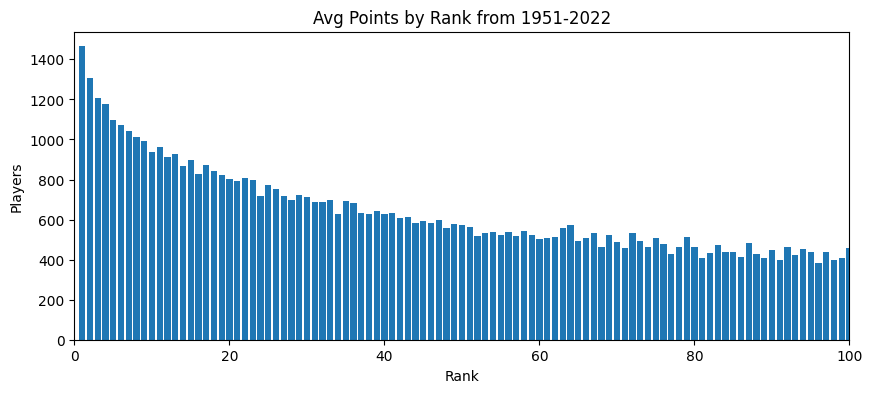

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x_rank_100,y_avg_points)

ax.set_xlabel('Rank')
ax.set_xlim([0,100])

ax.set_ylabel('Players')

ax.set_title('Avg Points by Rank from 1951-2022')
plt.show()

In [22]:
df_nba['Team'].unique()

array(['PHW', 'MNL', 'BOS', 'ROC', 'FTW', 'BAL', 'NYK', 'INO', 'SYR',
       'MIH', 'STL', 'DET', 'CIN', 'LAL', 'CHP', 'SFW', 'CHZ', 'BLT',
       'PHL', 'CHI', 'SEA', 'SDR', 'PHX', 'ATL', 'MIL', 'POR', 'BUF',
       'CLE', 'HOU', 'GOS', 'KCK', 'CAP', 'WAS', 'NOJ', 'DEN', 'IND',
       'SAN', 'NYN', 'NJN', 'SDC', 'UTH', 'DAL', 'LAC', 'SAC', 'CHH',
       'MIA', 'MIN', 'ORL', 'TOR', 'VAN', 'UTA', 'GSW', 'PHI', 'SAS',
       'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'], dtype=object)

In [23]:
df_sfw = df_nba[df_nba['Team']=='GSW']

In [24]:
'Stephen Curry' in df_sfw['Player'].unique()

True

In [25]:
df_sfw['Season Start Year'].unique()

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022])

In [26]:
df_nba_reg = df_nba[df_nba['Season Type']=='Regular Season']

In [27]:
df_points_by_season = round(df_nba_reg.groupby('Year')['Points Scored'].mean(),2)

In [28]:
x_season = df_points_by_season.index.values
y_points = df_points_by_season.values

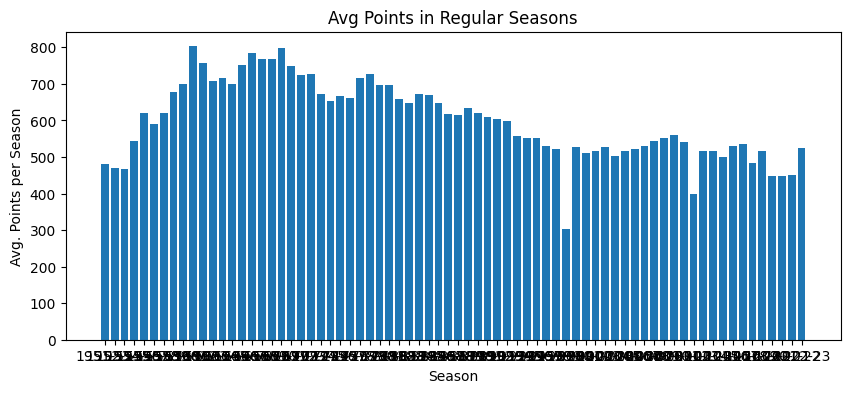

In [29]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x_season,y_points)

ax.set_xlabel('Season')

ax.set_ylabel('Avg. Points per Season')

ax.set_title('Avg Points in Regular Seasons')
plt.show()

In [30]:
df_nba.head()

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,17.0,7.0,32.0,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,17.0,7.0,32.0,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,17.0,7.0,32.0,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,17.0,7.0,32.0,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,17.0,7.0,32.0,269,1052,935,NaN,NaN


In [31]:
df_nba.columns

Index(['Rank', 'Year', 'Season Start Year', 'Season Type', 'Player ID',
       'Player', 'Team ID', 'Team', 'Games Played', 'Minutes Played',
       'FG Made', 'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts',
       '3-Pt FG %', 'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficency', 'AST/TOV',
       'STL/TOV'],
      dtype='object')

In [32]:
df_nba['TS'] = df_nba['Points Scored'] / (2 * (df_nba['FG Attempts'] + 0.44 + df_nba['FT Attempts']))
df_nba.head()

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV,TS
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,170,17.0,7.0,32.0,250,1674,1786,NaN,NaN,0.433805
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,194,17.0,7.0,32.0,286,1523,1592,NaN,NaN,0.386658
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,441,17.0,7.0,32.0,190,1433,1322,NaN,NaN,0.378212
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,232,17.0,7.0,32.0,174,1264,1396,NaN,NaN,0.418698
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,390,17.0,7.0,32.0,269,1052,935,NaN,NaN,0.384099


In [33]:
df_nba.groupby('Player')['Points Scored'].sum().sort_values(ascending=False)

Player
LeBron James           46675
Kareem Abdul-Jabbar    44149
Karl Malone            41689
Kobe Bryant            39283
Michael Jordan         38279
                       ...  
Jaime Echenique            0
Greg Whittington           0
Slavko Vranes              0
Darius Johnson-Odom        0
Ibrahim Kutluay            0
Name: Points Scored, Length: 4387, dtype: int64

In [34]:
df_nba[df_nba['Minutes Played'] > 500].sort_values(by='TS', ascending=False)

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV,TS
32938,365,2022-23,2022,Regular Season,1630579,Jericho Sims,1610612752,NYK,52,812,...,25,15.0,28.0,27.0,96,178,433,0.93,0.56,0.720998
31296,324,2020-21,2020,Regular Season,203503,Tony Snell,1610612737,ATL,47,992,...,59,13.0,11.0,21.0,75,249,340,2.81,0.62,0.682416
31935,183,2021-22,2021,Regular Season,1629057,Robert Williams III,1610612738,BOS,61,1804,...,121,56.0,134.0,63.0,137,607,1321,1.92,0.89,0.662028
32882,309,2022-23,2022,Regular Season,1629057,Robert Williams III,1610612738,BOS,35,824,...,50,22.0,48.0,34.0,68,279,598,1.47,0.65,0.659762
24770,171,2011-12,2011,Regular Season,200779,Steve Novak,1610612752,NYK,54,1020,...,12,16.0,9.0,21.0,59,477,417,0.57,0.76,0.656229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,284,1983-84,1983,Regular Season,77022,Johnny High,1610612756,PHX,29,512,...,51,40.0,11.0,38.0,84,46,123,1.34,1.05,0.282417
97,98,1951-52,1951,Regular Season,76311,Art Burris,1610612737,MIH,41,514,...,27,17.0,7.0,32.0,49,110,109,NaN,NaN,0.281416
465,77,1953-54,1953,Regular Season,77536,Al McGuire,1610612752,NYK,64,849,...,103,17.0,7.0,32.0,144,174,204,NaN,NaN,0.280247
466,78,1953-54,1953,Regular Season,76764,Joe Fulks,1610612744,PHW,61,501,...,28,17.0,7.0,32.0,90,150,90,NaN,NaN,0.269358


In [35]:
df_nba['tm_ast'] = np.nan
df_nba['tm_fg'] = np.nan

# Ignore this

In [36]:
for year in df_nba['Year'].unique():
    df_nba[df_nba['Year'] == year].groupby('Team')['Assists'].sum()

In [37]:
#df_nba[df_nba['Year'] == '1951-52'].groupby('Team', as_index=False)['Assists'].sum()
df_nba.merge(df_nba[df_nba['Year'] == '1951-52'].groupby(['Team', 'Year'], as_index=False)['Assists'].sum().rename(columns={'Team':'Team','Assists' : 'tm_ast'}), on='')
df_nba.head()

KeyError: ignored

In [ ]:
df_nba_t = df_nba
df_nba_t.merge(df_nba.groupby(['Team', 'Year'], as_index=False)['Assists'].sum().rename(columns={'Team':'Team','Assists' : 'tm_ast'}), on=['Team', 'Year'])
df_nba_t

In [ ]:
df_tmast = df_nba.groupby(['Team', 'Year'], as_index=False)['Assists'].sum().rename(columns={'Team':'Team','Assists' : 'tm_ast'})

# reg season vs playoffs graph

In [ ]:
df_filt = df_nba[(df_nba['Minutes Played'] > 100) & (df_nba['Season Start Year'] > 2002)]
print(df_filt.shape)
df_filt = df_filt.groupby(['Player', 'Season Type']).filter(lambda x: len(x) >= 3)
df_g = df_filt.groupby(['Season Type', 'Season Start Year'], as_index=False)['Efficency'].mean()

In [ ]:
df_playapp = df_filt.groupby(['Player', 'Season Type'], as_index=False).size()

In [ ]:
'Jamal Murray' in df_filt['Player'].values

In [ ]:
df_g

In [ ]:
df_eff = df_filt.merge(df_g.rename(columns = {'Efficency' : 'avg_eff'}), on = ['Season Type', 'Season Start Year'])
df_eff['avg_eff'].unique()

In [ ]:
df_eff

In [ ]:
df_eff = df_eff.merge(df_playapp, on=['Player', 'Season Type'])

In [ ]:
df_eff['eff_norm'] = df_eff['Efficency'] / df_eff['avg_eff']
df_eff

In [ ]:
#df_eff = df_eff[df_eff.groupby('Player').Player.transform('count') > 1]
df_eff = df_eff.sort_values(['Player', 'Season Type'])



In [ ]:
df_eff = df_eff[df_eff['eff_norm'] > 1]


In [ ]:
df_eff2 = df_eff.groupby(['Player', 'Season Type'], as_index=False)['eff_norm'].mean()
df_eff2

In [ ]:
pivot_df = pd.pivot_table(df_eff2, values='eff_norm', index='Player', columns='Season Type', aggfunc='first').reset_index()
pivot_df

In [ ]:
#pivot_df.

In [ ]:

pivot_df['diff'] = pivot_df['Regular Season'] - pivot_df['Playoffs']
pivot_df['perc_inc'] = pivot_df['Playoffs'] / pivot_df['Regular Season'] * 100
pivot_df.sort_values('perc_inc', ascending=False)


In [ ]:
pivot_df['Player'].values

In [ ]:
df_mosteff = pivot_df.sort_values('diff')
df_mosteff['diff'] = df_mosteff['diff'] * -1
df_mosteff.head(35)

In [ ]:
df_mosteff.loc[257]

In [ ]:
#df_mosteff.drop([81,700,768, 586]).head(15)

In [ ]:
'Stephen Curry' in df_mosteff['Player'].values

In [ ]:
df_playapp = df_playapp[df_playapp['Season Type'] == 'Playoffs']
df_mosteff = df_mosteff.merge(df_playapp, on='Player')

In [ ]:
df_mosteff.head(15)

In [ ]:
df_mosteff.loc[1], df_mosteff

In [ ]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib._png import read_png

In [ ]:
dray = read_png('Dray.png')
jamal = read_png('Jamal.png')
lbj = read_png('Lebron.png')
jb = read_png('JB.png')

In [ ]:
fig, ax = plt.subplots(figsize = (13,10))
#fig.set_facecolor('#D4D39B')
imagebox_dray = OffsetImage(dray, zoom=0.125)
ab_dray = AnnotationBbox(imagebox_dray, [.5,.5], xybox=(1.1,1.75), bboxprops={'boxstyle':'circle', 'linewidth': 2}, pad = 0)
ax.add_artist(ab_dray)

imagebox_jamal = OffsetImage(jamal, zoom=0.275)
ab_jamal = AnnotationBbox(imagebox_jamal, [.5,.5], xybox=(0.9,4.4), bboxprops={'boxstyle':'circle', 'linewidth': 2}, pad = 0)
ax.add_artist(ab_jamal)

imagebox_lbj = OffsetImage(lbj, zoom=0.275)
ab_lbj = AnnotationBbox(imagebox_lbj, [.5,.5], xybox=(.75,7.75), bboxprops={'boxstyle':'circle', 'linewidth': 2}, pad = 0)
ax.add_artist(ab_lbj)

imagebox_jb = OffsetImage(jb, zoom=0.0725)
ab_jb = AnnotationBbox(imagebox_jb, [.5,.5], xybox=(.8,11.5), bboxprops={'boxstyle':'circle', 'linewidth': 2}, pad = 0)
ax.add_artist(ab_jb)

ax.barh(df_mosteff['Player'].head(15), df_mosteff['diff'].head(15), color = '#5585BE')
ax.barh(df_mosteff['Player'].loc[2], df_mosteff['diff'].loc[2], color = '#1D428A')
ax.barh(df_mosteff['Player'].loc[1], df_mosteff['diff'].loc[1], color = '#E4E942')
ax.barh(df_mosteff['Player'].loc[3], df_mosteff['diff'].loc[3], color = '#E4E942')
ax.barh(df_mosteff['Player'].loc[10], df_mosteff['diff'].loc[10], color = '#E4E942')

ax.set_title('Clutch Gene - Who ups their game the most in the playoffs?', fontsize=20, fontname='Futura', color = '#0B1C3D')
ax.set_xlabel('Efficiency Increase (Scaled Playoff Efficiency minus Regular Season Efficiency)', fontname = 'Futura')
ax.set_ylabel('Player', fontname = 'Futura')
ax.set_xticks([0, 0.2, 0.4, 0.6,0.8, 1])
ax.vlines(x=.86,ymin=1,ymax=4,color='#0B1C3D',linewidth=2,alpha=1)
ax.vlines(x=1.1,ymin=0,ymax=1,color='#0B1C3D',linewidth=2,alpha=1)
ax.hlines(y=0,xmin=.95,xmax=1.24,color='#0B1C3D',linewidth=2,alpha=1)
ax.hlines(y=4.25,xmin=.95,xmax=1.24,color='#0B1C3D',linewidth=2,alpha=1)
ax.vlines(x=0.74,ymin=2,ymax=7,color='#0B1C3D',linewidth=2,alpha=1)
ax.hlines(y=7.8,xmin=.8,xmax=1.24,color='#0B1C3D',linewidth=2,alpha=1)
ax.vlines(x=0.585,ymin=8,ymax=11.5,color='#0B1C3D',linewidth=2,alpha=1)
ax.hlines(y=11.5,xmin=.585,xmax=1.24,color='#0B1C3D',linewidth=2,alpha=1)
ax.hlines(y=8,xmin=.48,xmax=.585,color='#0B1C3D',linewidth=2,alpha=1)

#ax.vlines(x=6.9,ymin=11.5,ymax=12.4,color='red',linewidth=2,alpha=0.5)
set1 = dict(facecolor='#E8E15E', edgecolor='none', alpha = .5)

ax.text(1.25,10.15,"On Jul 25, 2023 Jaylen Brown \nsigned the largest contract in \nNBA history (5 years, $303.7 \nMillion).This past season he \naveraged 22.7/5.6/3.4. He \nis a sneaker free agent.",fontsize=10,fontname='Futura',bbox=set1)
ax.text(1.25,6.8,"LeBron James has 16 playoff\nappearances. He averages \n28.5/9.0/7.2 as well as 1.7 \nsteals and 1.0 blocks.",fontsize=10,fontname='Futura',bbox=set1)
ax.text(1.25,3.5,"In his 3 playoff appearances\nJamal Murray has averaged \n25.0/5.0/6.3 on 47/40/91\nshooting splits.",fontsize=10,fontname='Futura',bbox=set1)
ax.text(1.25,0,"Bay Area Legend Draymond \nGreen averages 11.6/8.9/6.2 \nin the playoffs, compared to \n8.7/7.0/5.6 in the regular \nseason.",fontsize=10,fontname='Futura',bbox=set1)

colors = {'>5 Playoff Appearances':'#E4E942', '5-10 Appearances':'#5585BE', '>10 Playoff Appearances': '#1D428A'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),.8,.8, color=colors[label]) for label in labels]
plt.legend(handles, labels, borderpad=1)
plt.yticks(fontname='Futura')
plt.xticks(fontname='Futura')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.patch.set_facecolor('#EE6730')
ax.set_facecolor('#EE6730')
ax.xaxis.label.set_color('#0B1C3D')
ax.yaxis.label.set_color('#0B1C3D')
ax.tick_params(axis='x',  colors='#0B1C3D')
ax.tick_params(axis='y',  colors='#0B1C3D')
ax.spines['left'].set_color('#0B1C3D')
ax.spines['bottom'].set_color('#0B1C3D')
#fig.text(0.5, 0.05, 'Scaled Regular Season Efficiency minus Playoff Efficiency', wrap=True, horizontalalignment='center', fontsize=10, fontname='Futura')
plt.savefig('nbaplot3finalfr.png')

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))

ax.barh(df_mosteff['Player'].tail(15), df_mosteff['diff'].tail(15))
ax.set_title('Clutch Gene')
ax.set_xlabel('Efficiency Increase in Playoffs compared to Regular Season')
ax.set_ylabel('Player')
plt.show()

In [38]:
df_p = pd.read_html('https://hoopshype.com/salaries/players/')[0]

In [39]:
yrs = ['2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018', '2016-2017', '2015-2016', '2014-2015',
       '2013-2014', '2012-2013', '2011-2012', '2010-2011', '2009-2010', '2008-2009', '2007-2008', '2006-2007', '2005-2006',
       '2004-2005', '2003-2004']
df_sal = pd.DataFrame()
for year in yrs:
    try:
        str1 = 'https://hoopshype.com/salaries/players/' + year + '/'
        sals = pd.read_html(str1)[0]
        sals = sals.rename(columns={sals.columns[2]: 'salary'})
        sals['Year'] = sals.columns[3]
        sals = sals.drop(columns = sals.columns[3])
        df_sal = pd.concat([df_sal, sals], axis = 0)
    except Exception:
        pass

df_sal.shape


KeyboardInterrupt: ignored

In [ ]:
df_sal

In [ ]:
df_sal.to_csv('nba_sals.csv')

In [40]:
df_s = pd.read_csv('nba_sals.csv')

In [41]:
df_s.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
df_s

,Player,salary,Year
0,Stephen Curry,"$48,070,014",2022-2023
1,John Wall,"$47,345,760",2022-2023
2,Russell Westbrook,"$47,080,179",2022-2023
3,LeBron James,"$44,474,988",2022-2023
4,Kevin Durant,"$44,119,845",2022-2023
...,...,...,...
9767,Shane Heal,"$75,615",2003-2004
9768,Torraye Braggs,"$53,697",2003-2004
9769,Britton Johnsen,"$44,748",2003-2004
9770,Jelani McCoy,"$36,643",2003-2004


In [42]:
df_s['Year'] = df_s['Year'].str[0:5] + df_s['Year'].str[7:]
df_s

,Player,salary,Year
0,Stephen Curry,"$48,070,014",2022-23
1,John Wall,"$47,345,760",2022-23
2,Russell Westbrook,"$47,080,179",2022-23
3,LeBron James,"$44,474,988",2022-23
4,Kevin Durant,"$44,119,845",2022-23
...,...,...,...
9767,Shane Heal,"$75,615",2003-04
9768,Torraye Braggs,"$53,697",2003-04
9769,Britton Johnsen,"$44,748",2003-04
9770,Jelani McCoy,"$36,643",2003-04


In [43]:
df_nbasal =df_nba.merge(df_s, on= ['Player','Year'])

In [44]:
#df_nbasal['salary'] = df_nbasal['salary'].str[1:]
df_nbasal['salary'] = df_nbasal['salary'].str.replace(',', '').str.replace('$', '').astype(int)
df_nbasal

<ipython-input-44-4b80fc9e26f5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_nbasal['salary'] = df_nbasal['salary'].str.replace(',', '').str.replace('$', '').astype(int)


,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV,TS,tm_ast,tm_fg,salary
0,1,2003-04,2003,Regular Season,708,Kevin Garnett,1610612750,MIN,82,3232,...,212.0,202,1987,2717,1.93,0.57,0.478463,NaN,NaN,28000000
1,4,2003-04,2003,Playoffs,708,Kevin Garnett,1610612750,MIN,18,783,...,75.0,57,438,551,1.23,0.32,0.440254,NaN,NaN,28000000
2,3,2003-04,2003,Regular Season,1503,Tracy McGrady,1610612753,ORL,67,2675,...,179.0,129,1878,1591,2.07,0.52,0.454405,NaN,NaN,13279750
3,4,2003-04,2003,Regular Season,1718,Paul Pierce,1610612738,BOS,80,3101,...,303.0,234,1836,1639,1.35,0.43,0.431302,NaN,NaN,11326219
4,48,2003-04,2003,Playoffs,1718,Paul Pierce,1610612738,BOS,4,162,...,25.0,12,83,57,0.40,0.20,0.386262,NaN,NaN,11326219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,535,2022-23,2022,Regular Season,1629126,Deonte Burton,1610612758,SAC,2,7,...,0.0,0,0,-2,0.00,0.00,0.000000,NaN,NaN,105522
12218,535,2022-23,2022,Regular Season,1628402,Frank Jackson,1610612762,UTA,1,5,...,0.0,0,0,0,0.00,0.00,0.000000,NaN,NaN,113114
12219,535,2022-23,2022,Regular Season,1628425,Sterling Brown,1610612747,LAL,4,24,...,0.0,4,0,9,0.00,0.00,0.000000,NaN,NaN,3122602
12220,155,2022-23,2022,Playoffs,202684,Tristan Thompson,1610612747,LAL,6,32,...,1.0,1,11,12,2.00,0.00,0.334550,NaN,NaN,16700


In [45]:
df_nbac = pd.read_csv('cleaned NBA Data.csv')
df_nbac.columns

Index(['Rank', 'Season Start Year', 'Season Type', 'Player ID', 'Player',
       'Team ID', 'Team', 'Games Played', 'Minutes Played', 'FG Made',
       'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts', '3-Pt FG %',
       'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficency', 'AST/TOV',
       'STL/TOV', 'salary', 'Year', 'Efficiency new', 'True shooting perc',
       'salary below 0.25', 'salary above 0.75', 'efficiency below 0.25',
       'efficiency above 0.75', 'Player Category'],
      dtype='object')

In [46]:
df_nbac.head()
df_nbac.rename(columns={'True shooting perc': 'TS'}, inplace=True)

In [47]:
import seaborn as sns

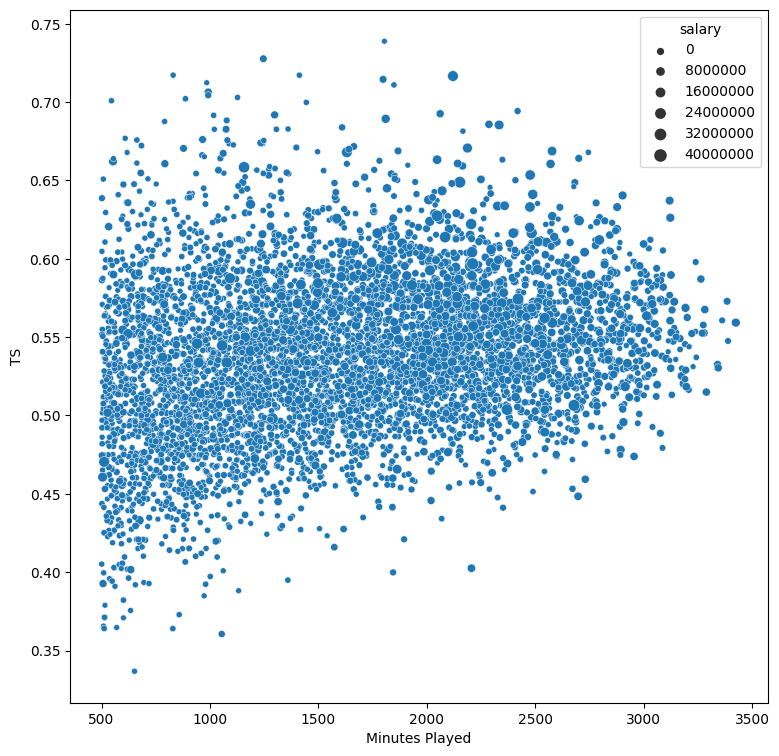

In [48]:
fig, ax = plt.subplots(figsize = (9,9))
sal_slice = df_nbac[(df_nbasal['salary'] > 500000) & (df_nbac['Minutes Played'] > 500) & (df_nbac['Season Type'] == 'Regular Season')]
sns.scatterplot(x=sal_slice['Minutes Played'], y=sal_slice['TS'], size=sal_slice['salary'])
plt.show()

In [49]:
df_nba[df_nba['Season Start Year'].astype(int) > 2003]

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV,TS,tm_ast,tm_fg
20068,1,2004-05,2004,Regular Season,947,Allen Iverson,1610612755,PHI,75,3173,...,9.0,344.0,140,2302,1865,1.73,0.52,0.441938,NaN,NaN
20069,2,2004-05,2004,Regular Season,2544,LeBron James,1610612739,CLE,80,3388,...,52.0,262.0,146,2175,2259,2.20,0.68,0.468661,NaN,NaN
20070,3,2004-05,2004,Regular Season,2405,Amar'e Stoudemire,1610612756,PHX,80,2886,...,130.0,189.0,278,2080,2141,0.69,0.41,0.487933,NaN,NaN
20071,4,2004-05,2004,Regular Season,2240,Gilbert Arenas,1610612764,WAS,80,3274,...,23.0,242.0,245,2038,1761,1.70,0.57,0.471009,NaN,NaN
20072,5,2004-05,2004,Regular Season,1717,Dirk Nowitzki,1610612742,DAL,78,3020,...,119.0,176.0,219,2032,2194,1.36,0.55,0.471803,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33325,194,2022-23,2022,Playoffs,203648,Thanasis Antetokounmpo,1610612749,MIL,2,5,...,0.0,0.0,0,0,0,0.00,0.00,0.000000,NaN,NaN
33326,194,2022-23,2022,Playoffs,1628418,Thomas Bryant,1610612743,DEN,1,1,...,0.0,0.0,0,0,0,0.00,0.00,0.000000,NaN,NaN
33327,194,2022-23,2022,Playoffs,2617,Udonis Haslem,1610612748,MIA,2,3,...,0.0,0.0,0,0,-2,0.00,0.00,0.000000,NaN,NaN
33328,194,2022-23,2022,Playoffs,1628427,Vlatko Cancar,1610612743,DEN,5,10,...,0.0,0.0,0,0,-1,0.00,0.00,0.000000,NaN,NaN


In [50]:
import plotly.express as px

In [51]:
df_nbac.columns

Index(['Rank', 'Season Start Year', 'Season Type', 'Player ID', 'Player',
       'Team ID', 'Team', 'Games Played', 'Minutes Played', 'FG Made',
       'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts', '3-Pt FG %',
       'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficency', 'AST/TOV',
       'STL/TOV', 'salary', 'Year', 'Efficiency new', 'TS',
       'salary below 0.25', 'salary above 0.75', 'efficiency below 0.25',
       'efficiency above 0.75', 'Player Category'],
      dtype='object')

In [52]:
df_nbac['MPG'] = df_nbac['Minutes Played'] / df_nbac['Games Played']

In [53]:
sal_slice = df_nbac[(df_nbac['salary'] > 500000) & (df_nbac['MPG'] > 15) & (df_nbac['Season Type'] == 'Regular Season')]

In [54]:
df_nba.tail(400)

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV,TS,tm_ast,tm_fg
32930,357,2022-23,2022,Regular Season,1630547,James Bouknight,1610612766,CHA,34,515,...,5.0,32.0,49,191,157,1.28,0.44,0.427408,NaN,NaN
32931,358,2022-23,2022,Regular Season,1630553,Keon Johnson,1610612757,POR,40,416,...,6.0,43.0,43,189,149,1.37,0.44,0.430642,NaN,NaN
32932,359,2022-23,2022,Regular Season,201580,JaVale McGee,1610612742,DAL,42,355,...,26.0,36.0,54,186,236,0.31,0.11,0.558760,NaN,NaN
32933,360,2022-23,2022,Regular Season,1631104,Blake Wesley,1610612759,SAS,37,669,...,5.0,65.0,67,184,165,1.51,0.39,0.354610,NaN,NaN
32934,361,2022-23,2022,Regular Season,203585,Rodney McGruder,1610612765,DET,32,524,...,1.0,11.0,39,183,197,2.54,1.46,0.524536,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33325,194,2022-23,2022,Playoffs,203648,Thanasis Antetokounmpo,1610612749,MIL,2,5,...,0.0,0.0,0,0,0,0.00,0.00,0.000000,NaN,NaN
33326,194,2022-23,2022,Playoffs,1628418,Thomas Bryant,1610612743,DEN,1,1,...,0.0,0.0,0,0,0,0.00,0.00,0.000000,NaN,NaN
33327,194,2022-23,2022,Playoffs,2617,Udonis Haslem,1610612748,MIA,2,3,...,0.0,0.0,0,0,-2,0.00,0.00,0.000000,NaN,NaN
33328,194,2022-23,2022,Playoffs,1628427,Vlatko Cancar,1610612743,DEN,5,10,...,0.0,0.0,0,0,-1,0.00,0.00,0.000000,NaN,NaN


In [55]:
df_yrs = sal_slice.groupby('Season Start Year', as_index=False)['TS'].mean()

In [56]:
df_yrs.rename(columns={'TS': 'Avg TS'}, inplace=True)

In [57]:
sal_s = sal_slice.merge(df_yrs, on = 'Season Start Year')
sal_s.head()

,Rank,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,FG Made,...,Year,Efficiency new,TS,salary below 0.25,salary above 0.75,efficiency below 0.25,efficiency above 0.75,Player Category,MPG,Avg TS
0,1,2004,Regular Season,947,Allen Iverson,1610612755,PHI,75,3173,771,...,2004.0,44.082887,0.525247,830280.0,5455200.0,3.514001,29.183903,Pro Player,42.306667,0.519872
1,2,2004,Regular Season,2544,LeBron James,1610612739,CLE,80,3388,795,...,2004.0,53.341204,0.547556,830280.0,5455200.0,3.514001,29.183903,False,42.350000,0.519872
2,4,2004,Regular Season,2240,Gilbert Arenas,1610612764,WAS,80,3274,656,...,2004.0,43.029933,0.557745,830280.0,5455200.0,3.514001,29.183903,Pro Player,40.925000,0.519872
3,5,2004,Regular Season,1717,Dirk Nowitzki,1610612742,DAL,78,3020,663,...,2004.0,56.666225,0.570370,830280.0,5455200.0,3.514001,29.183903,Pro Player,38.717949,0.519872
4,6,2004,Regular Season,1503,Tracy McGrady,1610612745,HOU,78,3182,715,...,2004.0,45.348837,0.520375,830280.0,5455200.0,3.514001,29.183903,Pro Player,40.794872,0.519872


In [58]:
sal_q33 = sal_s.groupby('Season Start Year')['salary'].quantile(.33)
ts_q67 = sal_s.groupby('Season Start Year')['TS'].quantile(.67)
sal_q = sal_s.merge(sal_q33, on = 'Season Start Year')
ts_sal = sal_q.merge(ts_q67, on = 'Season Start Year')
ts_sal


,Rank,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,FG Made,...,TS_x,salary below 0.25,salary above 0.75,efficiency below 0.25,efficiency above 0.75,Player Category,MPG,Avg TS,salary_y,TS_y
0,1,2004,Regular Season,947,Allen Iverson,1610612755,PHI,75,3173,771,...,0.525247,830280.0,5455200.00,3.514001,29.183903,Pro Player,42.306667,0.519872,1885639.68,0.536203
1,2,2004,Regular Season,2544,LeBron James,1610612739,CLE,80,3388,795,...,0.547556,830280.0,5455200.00,3.514001,29.183903,False,42.350000,0.519872,1885639.68,0.536203
2,4,2004,Regular Season,2240,Gilbert Arenas,1610612764,WAS,80,3274,656,...,0.557745,830280.0,5455200.00,3.514001,29.183903,Pro Player,40.925000,0.519872,1885639.68,0.536203
3,5,2004,Regular Season,1717,Dirk Nowitzki,1610612742,DAL,78,3020,663,...,0.570370,830280.0,5455200.00,3.514001,29.183903,Pro Player,38.717949,0.519872,1885639.68,0.536203
4,6,2004,Regular Season,1503,Tracy McGrady,1610612745,HOU,78,3182,715,...,0.520375,830280.0,5455200.00,3.514001,29.183903,Pro Player,40.794872,0.519872,1885639.68,0.536203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,414,2022,Regular Season,1627780,Gary Payton II,1610612744,GSW,22,368,41,...,0.698237,1563518.0,11061371.25,3.406488,31.292134,False,16.727273,0.575306,4366356.00,0.598218
5197,430,2022,Regular Season,202689,Kemba Walker,1610612742,DAL,9,144,24,...,0.537514,1563518.0,11061371.25,3.406488,31.292134,False,16.000000,0.575306,4366356.00,0.598218
5198,431,2022,Regular Season,1629677,Luka Samanic,1610612762,UTA,7,161,26,...,0.546102,1563518.0,11061371.25,3.406488,31.292134,False,23.000000,0.575306,4366356.00,0.598218
5199,447,2022,Regular Season,1628464,Daniel Theis,1610612754,IND,7,109,21,...,0.492958,1563518.0,11061371.25,3.406488,31.292134,False,15.571429,0.575306,4366356.00,0.598218


In [59]:
ts_sal['ts>.67&sal<.33'] = (ts_sal['salary_x'] < ts_sal['salary_y']) & (ts_sal['TS_x'] > ts_sal['TS_y'])
ts_sal

,Rank,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,FG Made,...,salary below 0.25,salary above 0.75,efficiency below 0.25,efficiency above 0.75,Player Category,MPG,Avg TS,salary_y,TS_y,ts>.67&sal<.33
0,1,2004,Regular Season,947,Allen Iverson,1610612755,PHI,75,3173,771,...,830280.0,5455200.00,3.514001,29.183903,Pro Player,42.306667,0.519872,1885639.68,0.536203,False
1,2,2004,Regular Season,2544,LeBron James,1610612739,CLE,80,3388,795,...,830280.0,5455200.00,3.514001,29.183903,False,42.350000,0.519872,1885639.68,0.536203,False
2,4,2004,Regular Season,2240,Gilbert Arenas,1610612764,WAS,80,3274,656,...,830280.0,5455200.00,3.514001,29.183903,Pro Player,40.925000,0.519872,1885639.68,0.536203,False
3,5,2004,Regular Season,1717,Dirk Nowitzki,1610612742,DAL,78,3020,663,...,830280.0,5455200.00,3.514001,29.183903,Pro Player,38.717949,0.519872,1885639.68,0.536203,False
4,6,2004,Regular Season,1503,Tracy McGrady,1610612745,HOU,78,3182,715,...,830280.0,5455200.00,3.514001,29.183903,Pro Player,40.794872,0.519872,1885639.68,0.536203,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,414,2022,Regular Season,1627780,Gary Payton II,1610612744,GSW,22,368,41,...,1563518.0,11061371.25,3.406488,31.292134,False,16.727273,0.575306,4366356.00,0.598218,False
5197,430,2022,Regular Season,202689,Kemba Walker,1610612742,DAL,9,144,24,...,1563518.0,11061371.25,3.406488,31.292134,False,16.000000,0.575306,4366356.00,0.598218,False
5198,431,2022,Regular Season,1629677,Luka Samanic,1610612762,UTA,7,161,26,...,1563518.0,11061371.25,3.406488,31.292134,False,23.000000,0.575306,4366356.00,0.598218,False
5199,447,2022,Regular Season,1628464,Daniel Theis,1610612754,IND,7,109,21,...,1563518.0,11061371.25,3.406488,31.292134,False,15.571429,0.575306,4366356.00,0.598218,False


In [60]:
import plotly.graph_objects as go


In [61]:
ts_sal.rename(columns={'salary_x': 'salary'}, inplace=True)

In [62]:
ts_sal

,Rank,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,FG Made,...,salary below 0.25,salary above 0.75,efficiency below 0.25,efficiency above 0.75,Player Category,MPG,Avg TS,salary_y,TS_y,ts>.67&sal<.33
0,1,2004,Regular Season,947,Allen Iverson,1610612755,PHI,75,3173,771,...,830280.0,5455200.00,3.514001,29.183903,Pro Player,42.306667,0.519872,1885639.68,0.536203,False
1,2,2004,Regular Season,2544,LeBron James,1610612739,CLE,80,3388,795,...,830280.0,5455200.00,3.514001,29.183903,False,42.350000,0.519872,1885639.68,0.536203,False
2,4,2004,Regular Season,2240,Gilbert Arenas,1610612764,WAS,80,3274,656,...,830280.0,5455200.00,3.514001,29.183903,Pro Player,40.925000,0.519872,1885639.68,0.536203,False
3,5,2004,Regular Season,1717,Dirk Nowitzki,1610612742,DAL,78,3020,663,...,830280.0,5455200.00,3.514001,29.183903,Pro Player,38.717949,0.519872,1885639.68,0.536203,False
4,6,2004,Regular Season,1503,Tracy McGrady,1610612745,HOU,78,3182,715,...,830280.0,5455200.00,3.514001,29.183903,Pro Player,40.794872,0.519872,1885639.68,0.536203,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,414,2022,Regular Season,1627780,Gary Payton II,1610612744,GSW,22,368,41,...,1563518.0,11061371.25,3.406488,31.292134,False,16.727273,0.575306,4366356.00,0.598218,False
5197,430,2022,Regular Season,202689,Kemba Walker,1610612742,DAL,9,144,24,...,1563518.0,11061371.25,3.406488,31.292134,False,16.000000,0.575306,4366356.00,0.598218,False
5198,431,2022,Regular Season,1629677,Luka Samanic,1610612762,UTA,7,161,26,...,1563518.0,11061371.25,3.406488,31.292134,False,23.000000,0.575306,4366356.00,0.598218,False
5199,447,2022,Regular Season,1628464,Daniel Theis,1610612754,IND,7,109,21,...,1563518.0,11061371.25,3.406488,31.292134,False,15.571429,0.575306,4366356.00,0.598218,False


In [63]:

scatter  = px.scatter(ts_sal, x= 'MPG', y='TS_x', size= 'salary',
              hover_name="Player", color='ts>.67&sal<.33', hover_data={'Season Start Year': False,'ts>.67&sal<.33':False},
              animation_frame="Season Start Year", title='True Shooting Percentage vs MPG', range_y=[.3,.8],
              color_discrete_sequence=['#5585BE', '#E4E942'], labels={'MPG': 'Minutes Per Game', 'TS_x':'True Shooting Percentage'})
line = px.line(sal_s, x="MPG", y="Avg TS", hover_data={'MPG':False, 'Season Start Year': False}, animation_frame="Season Start Year", color_discrete_sequence=['#1D428A'])
fig = go.Figure(
    data=line.data + scatter.data,
    frames=[
        go.Frame(data=fr1.data + fr2.data, name=fr1.name)
        for fr1, fr2 in zip(line.frames, scatter.frames)
    ],
    layout=scatter.layout,
)
fig.update_layout(
    font_family="Futura",
    font_color="#0B1C3D")
fig.update_layout(legend_title_text='Players in the top <br>third of TS% and <br>bottom third of salary')
#fig.update_layout(paper_bgcolor='#EE6730')
fig

In [64]:
fig.write_html("nba_plot2final.html")

In [65]:
ts_sal.columns

Index(['Rank', 'Season Start Year', 'Season Type', 'Player ID', 'Player',
       'Team ID', 'Team', 'Games Played', 'Minutes Played', 'FG Made',
       'FG Attempts', 'FG %', '3-Pt FG Made', '3-Pt FG Attempts', '3-Pt FG %',
       'FT Made', 'FT Attempts', 'FT %', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored', 'Efficency', 'AST/TOV',
       'STL/TOV', 'salary', 'Year', 'Efficiency new', 'TS_x',
       'salary below 0.25', 'salary above 0.75', 'efficiency below 0.25',
       'efficiency above 0.75', 'Player Category', 'MPG', 'Avg TS', 'salary_y',
       'TS_y', 'ts>.67&sal<.33'],
      dtype='object')

In [66]:
teameff = ts_sal[ts_sal['Season Start Year'] == 2015].groupby('Team')['Efficency'].sum().sort_values()

In [67]:
teameff

Team
PHI    5993
LAL    6337
PHX    6455
BKN    6813
DAL    7136
MEM    7151
DET    7421
NOP    7707
MIL    7739
WAS    7821
ORL    7922
NYK    7926
OKC    8248
UTA    8249
HOU    8335
ATL    8441
DEN    8479
MIN    8503
POR    8719
TOR    8764
IND    8797
SAS    8825
LAC    8885
CHI    8904
BOS    8924
SAC    9131
CLE    9253
CHA    9303
MIA    9826
GSW    9968
Name: Efficency, dtype: int64

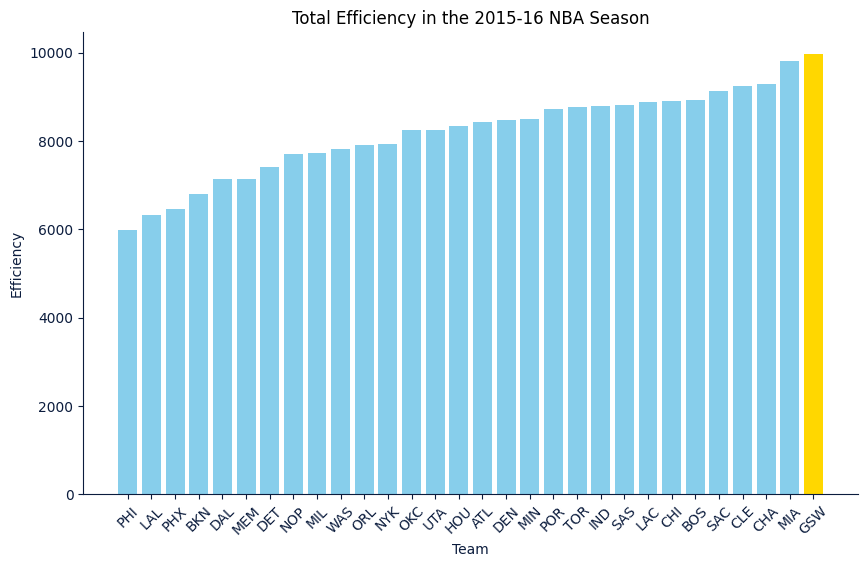

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(teameff.index[0:-1], teameff[0:-1], color='skyblue')
ax.bar(teameff.index[-1], teameff[-1], color='gold')
plt.title('Total Efficiency in the 2015-16 NBA Season')
plt.xlabel('Team')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)
#colors = {'>5 Playoff Appearances':'#E4E942', '5-10 Appearances':'#5585BE', '>10 Playoff Appearances': '#1D428A'}
#labels = list(colors.keys())
#handles = [plt.Rectangle((0,0),.8,.8, color=colors[label]) for label in labels]
#plt.legend(handles, labels, borderpad=1)
#plt.yticks(fontname='Futura')
#plt.xticks(fontname='Futura')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#fig.patch.set_facecolor('#EE6730')
#ax.set_facecolor('#EE6730')
ax.xaxis.label.set_color('#0B1C3D')
ax.yaxis.label.set_color('#0B1C3D')
ax.tick_params(axis='x',  colors='#0B1C3D')
ax.tick_params(axis='y',  colors='#0B1C3D')
ax.spines['left'].set_color('#0B1C3D')
ax.spines['bottom'].set_color('#0B1C3D')
plt.show()